In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("symptoms_dataset/Cleaned-Data.csv")

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [5]:
r, c = df.shape
print(r, c)

316800 27


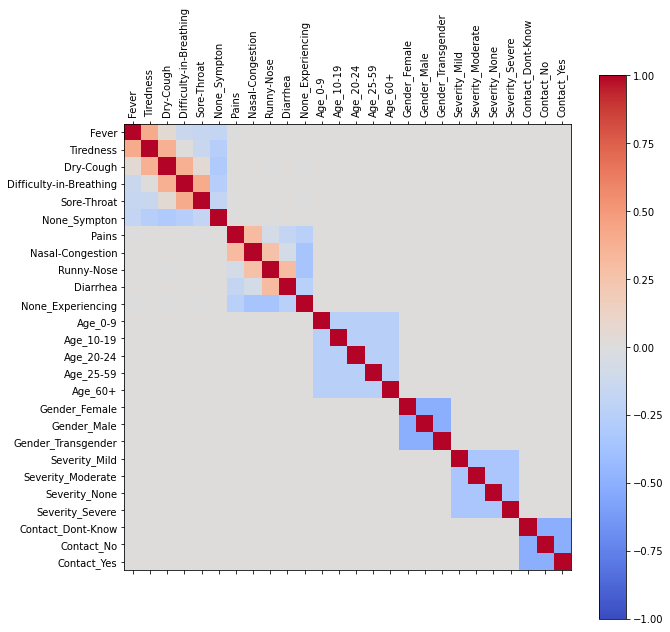

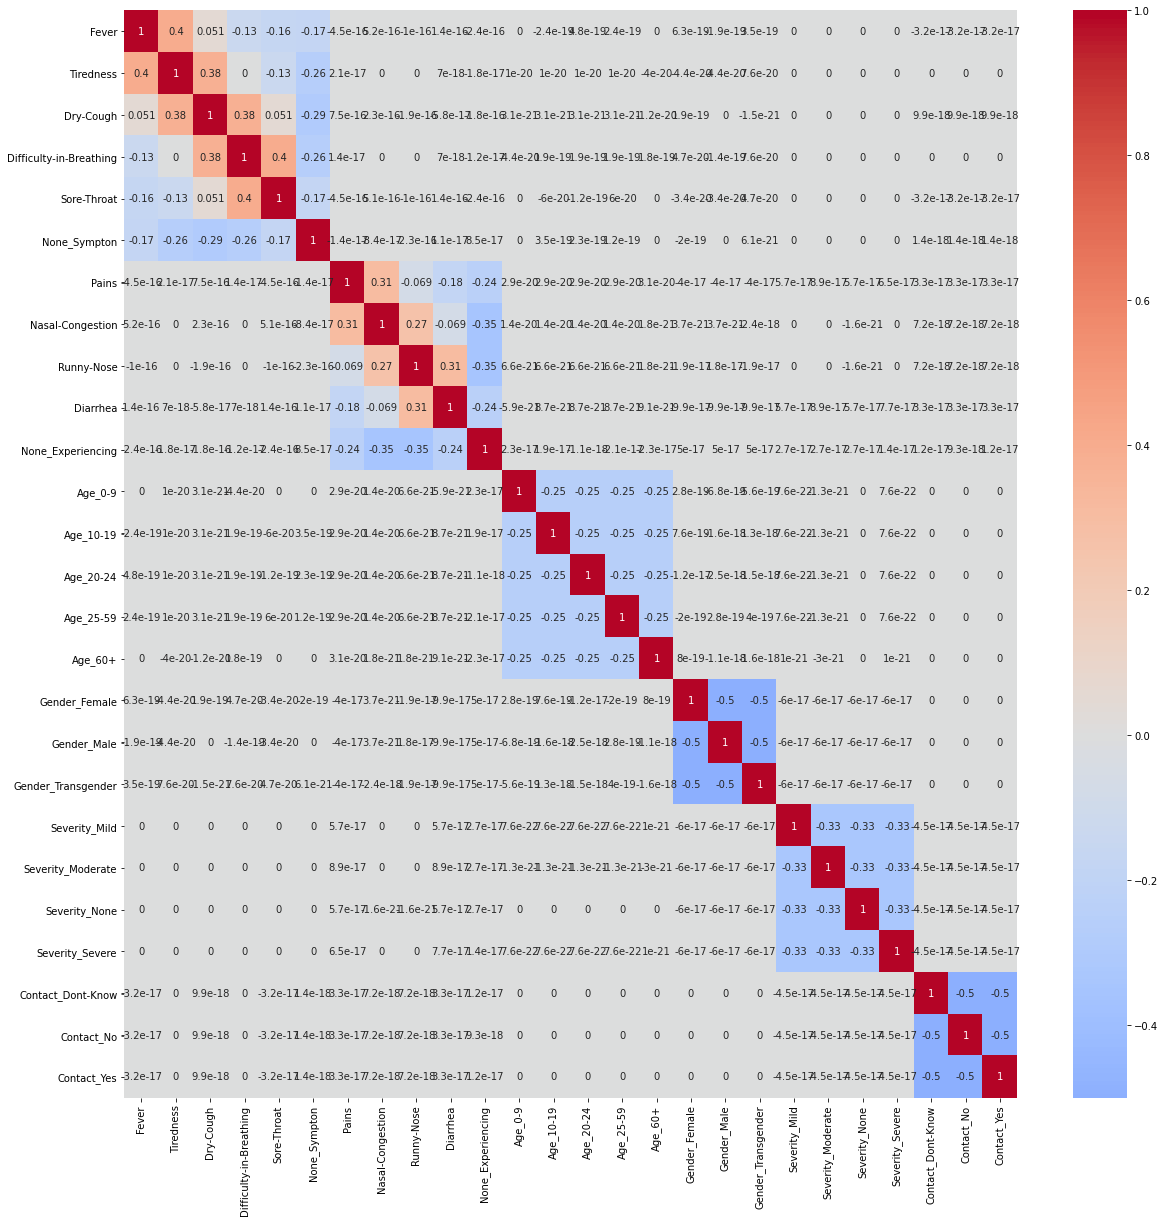

In [39]:
corr = df.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

fig = plt.figure(figsize = [20,20])
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm', center = 0)
plt.show()

Interesting that there isn't any correlation between symptoms and age. 

Correlations are very weak, even for symptoms against each other.

In [7]:
count = 0
for row in df.index:
    if df["Fever"][row] == 0:
        count += 1
print(count)

217800


217,800 people didn't have a fever

In [8]:
count = 0
for row in df.index:
    if df["None_Sympton"][row] == 1:
        count += 1
print(count)

19800


19,800 people were completely asymptomatic out of the 316800 people.

In [9]:
df.groupby(['Severity_Moderate'])
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


<Figure size 1080x1080 with 0 Axes>

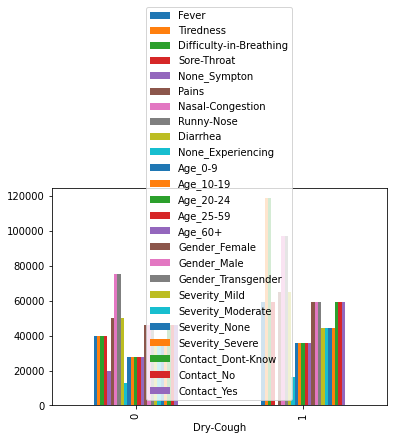

In [14]:
plt.figure(figsize=(15,15))
df.groupby('Dry-Cough').sum().plot(kind='bar')
plt.show()

In [15]:
df["Country"].unique()

array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

In [18]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


Text(0.5, 1.0, 'Frequency')

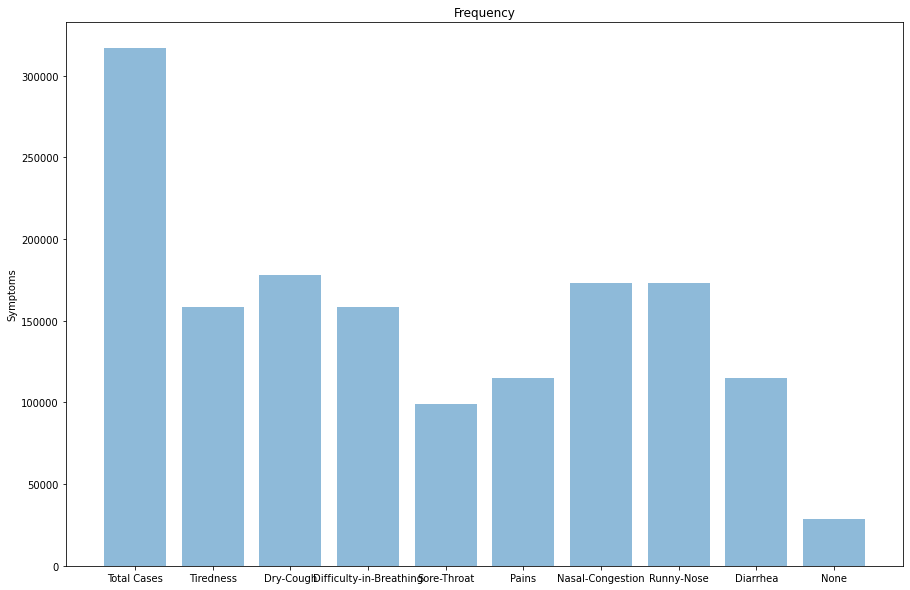

In [40]:
symptoms = ("Total Cases","Tiredness", "Dry-Cough", "Difficulty-in-Breathing", "Sore-Throat", "Pains", "Nasal-Congestion", "Runny-Nose", "Diarrhea" ,"None")
y_pos = np.arange(len(symptoms))
totals = [316800, df["Tiredness"].sum(),df["Dry-Cough"].sum(),df["Difficulty-in-Breathing"].sum(),df["Sore-Throat"].sum(),df["Pains"].sum(),df["Nasal-Congestion"].sum(),df["Runny-Nose"].sum(),df["Diarrhea"].sum(), df["None_Experiencing"].sum()]

plt.figure(figsize=(15,10))
plt.bar(y_pos, totals, align='center', alpha=0.5)
plt.xticks(y_pos, symptoms)
plt.ylabel('Symptoms')
plt.title('Frequency')